In [3]:
from pyod.models.mcd import MCD
import pandas as pd
import numpy as np

In [4]:
outliers_fraction = 0.01
random_state = np.random.RandomState(42)

mcd_detector = MCD(contamination=outliers_fraction, random_state=random_state)

In [5]:
# Read the features dataset
dataset = pd.read_csv("with-new-features.csv")
dataset

,Id,ActivityMinute,Calories,Steps,Heartrate,is_morning,is_daytime,is_evening,is_sleep
0,2022484408,2016-04-12 07:21:00,3.32064,17,97.0,1,0,0,0
1,2022484408,2016-04-12 07:23:00,1.34901,0,60.0,1,0,0,0
2,2022484408,2016-04-12 07:24:00,1.03770,0,58.0,1,0,0,0
3,2022484408,2016-04-12 07:26:00,2.49048,7,53.0,1,0,0,0
4,2022484408,2016-04-12 07:27:00,1.03770,0,53.0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
200068,8877689391,2016-05-12 12:23:00,8.24364,97,100.0,0,1,0,0
200069,8877689391,2016-05-12 12:24:00,8.24364,101,97.0,0,1,0,0
200070,8877689391,2016-05-12 12:25:00,7.75872,101,93.0,0,1,0,0
200071,8877689391,2016-05-12 13:54:00,1.33353,0,63.0,0,1,0,0


In [6]:
# Take useful feature and standardize thems
data = dataset[['Calories', 'Steps', 'Heartrate', 'is_morning', 'is_daytime','is_evening', 'is_sleep']]
data

,Calories,Steps,Heartrate,is_morning,is_daytime,is_evening,is_sleep
0,3.32064,17,97.0,1,0,0,0
1,1.34901,0,60.0,1,0,0,0
2,1.03770,0,58.0,1,0,0,0
3,2.49048,7,53.0,1,0,0,0
4,1.03770,0,53.0,1,0,0,0
...,...,...,...,...,...,...,...
200068,8.24364,97,100.0,0,1,0,0
200069,8.24364,101,97.0,0,1,0,0
200070,7.75872,101,93.0,0,1,0,0
200071,1.33353,0,63.0,0,1,0,0


In [8]:
X = data.values
mcd_detector.fit(X)
pred = mcd_detector.predict(X)

/home/kritish/.virtualenvs/dm/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:738: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn(


In [28]:
new_frame= pd.DataFrame(pred, columns=['is_anomaly'], index=dataset.index)

In [29]:
new_frame.is_anomaly.value_counts()

0    198072
1      2001
Name: is_anomaly, dtype: int64

In [32]:
### merge dataset with anomaly
ress = pd.concat([dataset, new_frame], axis=1, join="inner")
ress

,Id,ActivityMinute,Calories,Steps,Heartrate,is_morning,is_daytime,is_evening,is_sleep,is_anomaly
0,2022484408,2016-04-12 07:21:00,3.32064,17,97.0,1,0,0,0,0
1,2022484408,2016-04-12 07:23:00,1.34901,0,60.0,1,0,0,0,0
2,2022484408,2016-04-12 07:24:00,1.03770,0,58.0,1,0,0,0,0
3,2022484408,2016-04-12 07:26:00,2.49048,7,53.0,1,0,0,0,0
4,2022484408,2016-04-12 07:27:00,1.03770,0,53.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
200068,8877689391,2016-05-12 12:23:00,8.24364,97,100.0,0,1,0,0,0
200069,8877689391,2016-05-12 12:24:00,8.24364,101,97.0,0,1,0,0,0
200070,8877689391,2016-05-12 12:25:00,7.75872,101,93.0,0,1,0,0,0
200071,8877689391,2016-05-12 13:54:00,1.33353,0,63.0,0,1,0,0,0


In [33]:
## Plot the graph for 1 user with Calories 
df = ress.loc[ress['Id']==2022484408 ]

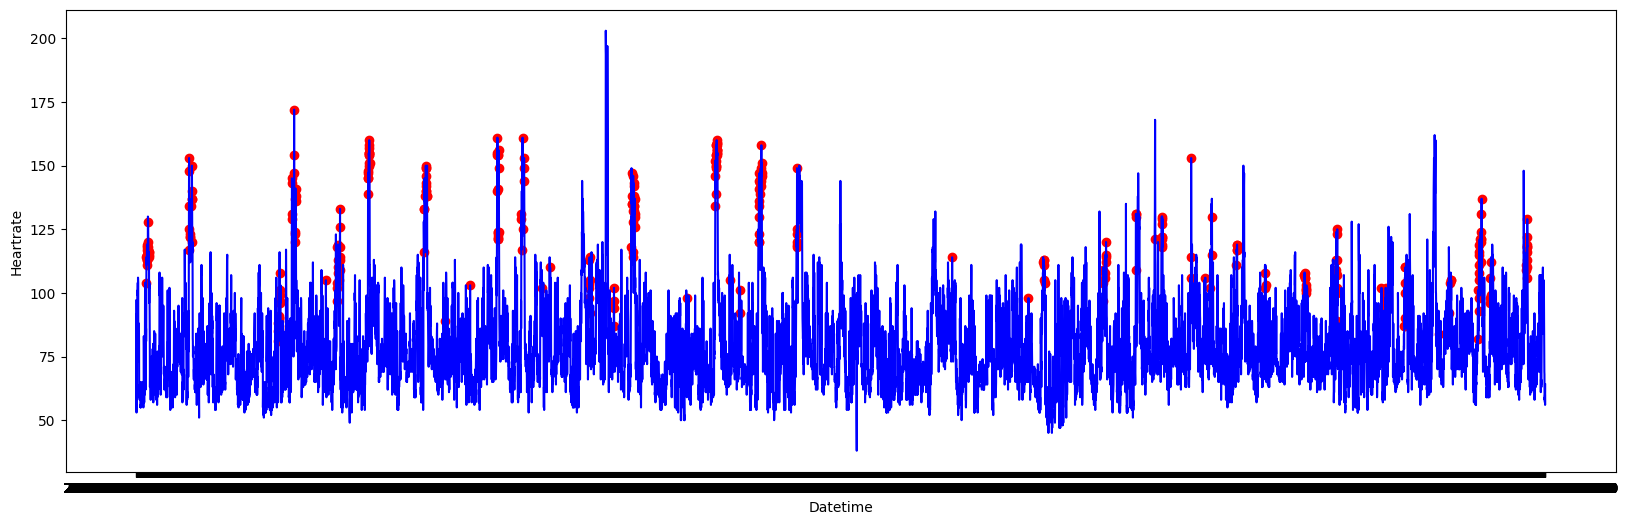

In [46]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(20,6))

a = df.loc[df['is_anomaly'] == 1, ['Heartrate']] #anomaly
b = df.loc[df['is_anomaly'] == 1, ['ActivityMinute']]

ax.plot(df['ActivityMinute'],df['Heartrate'], color='blue')
ax.scatter(b['ActivityMinute'], a['Heartrate'], color='red')
ax.set_xlabel("Datetime")
ax.set_ylabel("Heartrate")
plt.show()

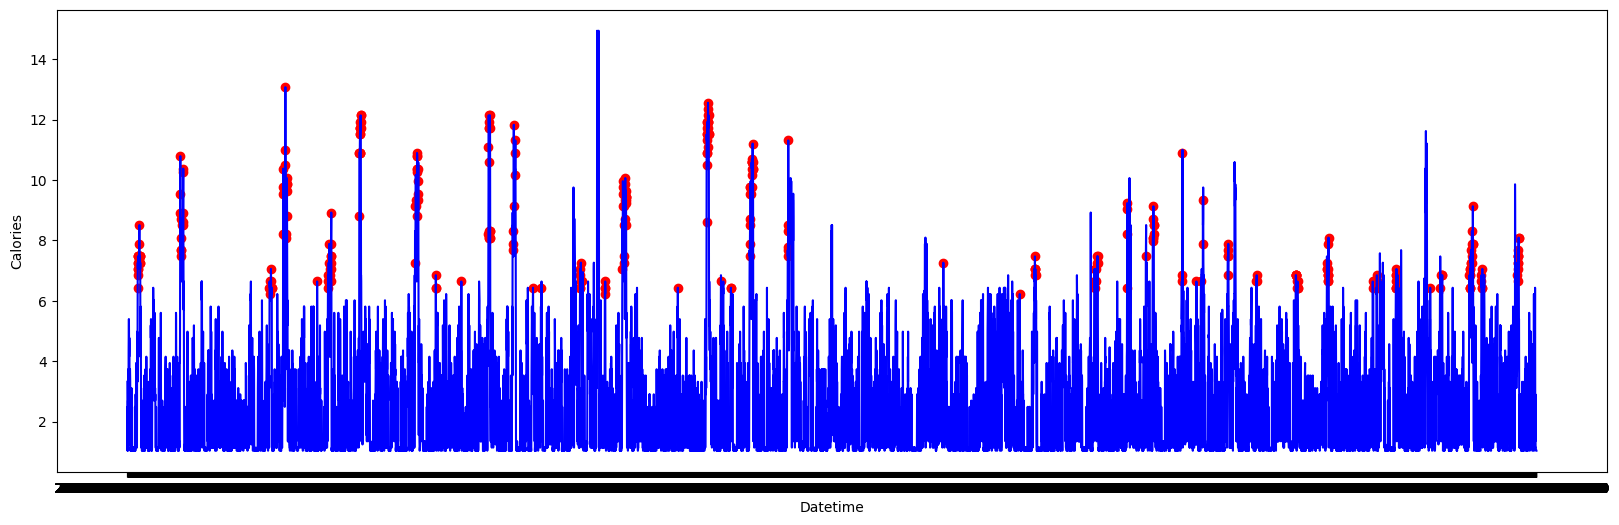

In [47]:
fig, ax = plt.subplots(figsize=(20,6))

a = df.loc[df['is_anomaly'] == 1, ['Calories']] #anomaly
b = df.loc[df['is_anomaly'] == 1, ['ActivityMinute']]

ax.plot(df['ActivityMinute'],df['Calories'], color='blue')
ax.scatter(b['ActivityMinute'], a['Calories'], color='red')
ax.set_xlabel("Datetime")
ax.set_ylabel("Calories")
plt.show()